## Main goals for analysis:
* Scan duration (each separate scan)
* Number of packets sent/received/overall
* Packets pr. second
* Order of ports scanned
* Payloads

* IP-ID
* Packet size
* TCP Window size
* Sequence number

###### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import numpy as np

scanner_ip = "192.168.2.230"
scan_title = 'nmap PING scan (polite)'
plt.rcParams["figure.figsize"] = (15,10)

###### Read data - output from 'process_pcap_with_payload.py'

In [2]:
directory = '/home/USER/notebooks/pcaps/nmap_ping_scan_polite'
scan_list = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        filename, ext = os.path.splitext(f)
        if ext == '.csv':
            read = pd.read_csv(f)
            if read.empty:
                pass
            else:
                scan_list.append(read)

## Scan duration

In [3]:
scan_list[0]['time'][-1:]-scan_list[0]['time'][0]

1999    400.492394
Name: time, dtype: float64

In [4]:
duration_list = []
for t in scan_list:
    diff = float(t['time'][-1:]-t['time'][0])
    duration_list.append(diff)
    
scan_times = pd.Series(duration_list, name='Scan times')

In [5]:
scan_times
#duration_list

0    400.492394
1    400.562461
2    400.664355
3    400.520332
4    400.474066
5    400.471934
6    400.570341
7    400.459660
8    400.380910
9    400.566432
Name: Scan times, dtype: float64

In [6]:
temp = pd.DataFrame(duration_list)

In [7]:
temp.mean()

0    400.516289
dtype: float64

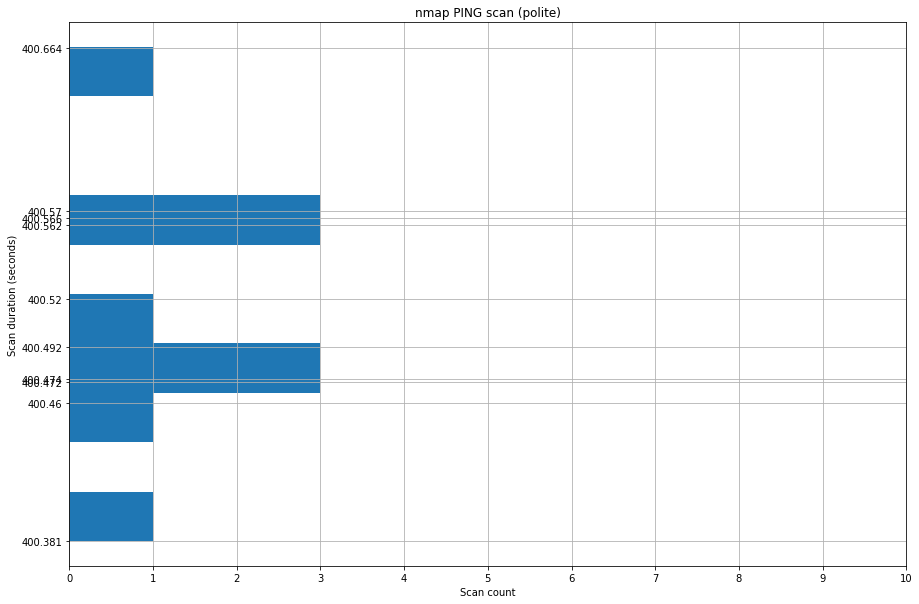

In [8]:
temp.hist(orientation='horizontal')
bin = np.arange(11)
plt.xlabel('Scan count')
plt.ylabel('Scan duration (seconds)')
plt.title(scan_title)
plt.xticks(bin, bin)
yvals = []
for y in duration_list:
    yvals.append(round(y, 3))
        
plt.yticks(yvals, yvals)
plt.savefig(directory + '/Histogram.png')

In [9]:
temp.describe()

,0
count,10.000000
mean,400.516289
std,0.078431
min,400.380910
25%,400.472467
50%,400.506363
75%,400.565439
max,400.664355


## Packet count

In [10]:
number_of_scans = len(scan_list)

print(f"Number of scans: {number_of_scans}")

Number of scans: 10


In [11]:
packet_count_overall = 0
src_count = 0
dst_count = 0
total = 0
for scan in scan_list:
    for x in range(0,len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            src_count = src_count+1
            
        elif scan['ip_dst'][x] == scanner_ip:
            dst_count = dst_count+1

        total = total+1


print(f"Overall packet count: {total}")
print(f"Overall sent packets to scanner: {dst_count}")
print(f"Overall received packets from scanner: {src_count}")

Overall packet count: 20000
Overall sent packets to scanner: 10000
Overall received packets from scanner: 10000


## Packets pr. second

In [12]:
avg = float(scan_times.mean())
if avg < 1:
    pps = (total * avg)
else:
    pps = (total / avg)
print(f"Packets pr. second: {pps}")

Packets pr. second: 49.93554712583415



## Order of ports scanned


In [13]:
scannr = []
sport = []
dport = []

for scan in scan_list:
    i = 1
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                print(i, scan['tcp_sport'][x], scan['tcp_dport'][x])
                scannr.append(i)
                sport.append(scan['tcp_sport'][x])
                dport.append(scan['tcp_dport'][x])
                i = i+1

orders_port = pd.DataFrame({'scannr': scannr,
                            'sport': sport,
                            'dport': dport
                           })

1 38666 1720
2 38666 587
3 38666 256
4 38666 23
5 38666 5900
6 38666 21
7 38666 111
8 38666 554
9 38666 139
10 38666 8080
11 38666 80
12 38666 135
13 38666 445
14 38666 443
15 38666 113
16 38666 995
17 38666 3389
18 38666 3306
19 38666 8888
20 38666 22
21 38666 993
22 38666 199
23 38666 25
24 38666 1025
25 38666 110
26 38666 1723
27 38666 53
28 38666 143
29 38666 8088
30 38666 14000
31 38666 1039
32 38666 481
33 38666 34571
34 38666 2004
35 38666 4129
36 38666 8292
37 38666 1185
38 38666 1071
39 38666 1009
40 38666 458
41 38666 1029
42 38666 8181
43 38666 5002
44 38666 1783
45 38666 5560
46 38666 4444
47 38666 2701
48 38666 5222
49 38666 3945
50 38666 1096
51 38666 16018
52 38666 33
53 38666 912
54 38666 42510
55 38666 2190
56 38666 9110
57 38666 33899
58 38666 6156
59 38666 2033
60 38666 691
61 38666 545
62 38666 1007
63 38666 19780
64 38666 50000
65 38666 1124
66 38666 1521
67 38666 2065
68 38666 49176
69 38666 7004
70 38666 254
71 38666 88
72 38666 8000
73 38666 2382
74 38666 49
75 

624 38666 5952
625 38666 57797
626 38666 9595
627 38666 1658
628 38666 5915
629 38666 32781
630 38666 1021
631 38666 2288
632 38666 10004
633 38666 2196
634 38666 32770
635 38666 2135
636 38666 79
637 38666 5061
638 38666 144
639 38666 280
640 38666 10628
641 38666 60443
642 38666 32782
643 38666 7625
644 38666 1092
645 38666 9002
646 38666 10621
647 38666 406
648 38666 1149
649 38666 524
650 38666 2003
651 38666 3017
652 38666 4445
653 38666 3390
654 38666 60020
655 38666 9503
656 38666 8045
657 38666 8194
658 38666 9
659 38666 1192
660 38666 3128
661 38666 7512
662 38666 1090
663 38666 1165
664 38666 4001
665 38666 901
666 38666 1072
667 38666 3001
668 38666 2909
669 38666 8010
670 38666 2394
671 38666 5998
672 38666 64680
673 38666 2047
674 38666 1154
675 38666 2725
676 38666 6567
677 38666 2393
678 38666 5001
679 38666 3211
680 38666 5269
681 38666 5051
682 38666 6000
683 38666 2920
684 38666 1095
685 38666 1030
686 38666 1114
687 38666 2381
688 38666 5054
689 38666 1641
690 38666 

290 40859 3006
291 40859 5959
292 40859 5877
293 40859 2004
294 40859 666
295 40859 15000
296 40859 2702
297 40859 1097
298 40859 15003
299 40859 5054
300 40859 19842
301 40859 6580
302 40859 4449
303 40859 668
304 40859 61900
305 40859 1839
306 40859 16113
307 40859 1050
308 40859 6779
309 40859 5222
310 40859 1271
311 40859 8500
312 40859 5061
313 40859 2170
314 40859 3128
315 40859 2725
316 40859 1801
317 40859 20031
318 40859 1141
319 40859 24
320 40859 10025
321 40859 616
322 40859 1972
323 40859 3801
324 40859 12265
325 40859 2492
326 40859 2005
327 40859 1067
328 40859 1199
329 40859 5678
330 40859 1010
331 40859 524
332 40859 5280
333 40859 8701
334 40859 6788
335 40859 2040
336 40859 2811
337 40859 7911
338 40859 2809
339 40859 3476
340 40859 52673
341 40859 5000
342 40859 1122
343 40859 8400
344 40859 19315
345 40859 1033
346 40859 1700
347 40859 55056
348 40859 2701
349 40859 1111
350 40859 49156
351 40859 7201
352 40859 8085
353 40859 3800
354 40859 1032
355 40859 8007
356 

956 40859 1071
957 40859 2035
958 40859 9593
959 40859 5102
960 40859 10243
961 40859 6567
962 40859 8654
963 40859 2383
964 40859 1914
965 40859 5440
966 40859 1186
967 40859 34571
968 40859 5633
969 40859 2046
970 40859 49153
971 40859 5901
972 40859 8652
973 40859 1091
974 40859 1039
975 40859 541
976 40859 8300
977 40859 2103
978 40859 1011
979 40859 49161
980 40859 10009
981 40859 26214
982 40859 9081
983 40859 3737
984 40859 1070
985 40859 10616
986 40859 1045
987 40859 2869
988 40859 1042
989 40859 5902
990 40859 10003
991 40859 1259
992 40859 5405
993 40859 13783
994 40859 1521
995 40859 1112
996 40859 8093
997 40859 1044
998 40859 50300
999 40859 9071
1000 40859 1862
1 47518 995
2 47518 993
3 47518 587
4 47518 23
5 47518 8080
6 47518 256
7 47518 111
8 47518 1723
9 47518 80
10 47518 113
11 47518 1720
12 47518 25
13 47518 139
14 47518 3306
15 47518 22
16 47518 443
17 47518 135
18 47518 143
19 47518 5900
20 47518 8888
21 47518 445
22 47518 110
23 47518 554
24 47518 1025
25 47518 

801 47518 2008
802 47518 2393
803 47518 9666
804 47518 9594
805 47518 20031
806 47518 2710
807 47518 911
808 47518 10621
809 47518 2875
810 47518 1583
811 47518 8008
812 47518 1718
813 47518 3527
814 47518 79
815 47518 9575
816 47518 8300
817 47518 8022
818 47518 1999
819 47518 1000
820 47518 5925
821 47518 100
822 47518 1069
823 47518 2111
824 47518 6100
825 47518 2105
826 47518 24444
827 47518 1063
828 47518 1984
829 47518 50800
830 47518 1805
831 47518 49154
832 47518 2222
833 47518 27352
834 47518 2998
835 47518 3268
836 47518 31038
837 47518 9415
838 47518 8651
839 47518 9002
840 47518 8292
841 47518 8081
842 47518 27353
843 47518 1098
844 47518 3404
845 47518 49152
846 47518 19
847 47518 2251
848 47518 8193
849 47518 2161
850 47518 6156
851 47518 8873
852 47518 1500
853 47518 5060
854 47518 6101
855 47518 2001
856 47518 8021
857 47518 4002
858 47518 19283
859 47518 6059
860 47518 8180
861 47518 10628
862 47518 2048
863 47518 15660
864 47518 63331
865 47518 5190
866 47518 5214
867

455 56528 1114
456 56528 5633
457 56528 2111
458 56528 1309
459 56528 4662
460 56528 16018
461 56528 1914
462 56528 5003
463 56528 1782
464 56528 1080
465 56528 8443
466 56528 9618
467 56528 1
468 56528 3986
469 56528 32775
470 56528 6547
471 56528 2288
472 56528 259
473 56528 3914
474 56528 3211
475 56528 3404
476 56528 9200
477 56528 3659
478 56528 55555
479 56528 512
480 56528 1111
481 56528 1108
482 56528 10778
483 56528 81
484 56528 5815
485 56528 60020
486 56528 9080
487 56528 55056
488 56528 3001
489 56528 6101
490 56528 9415
491 56528 280
492 56528 5962
493 56528 8192
494 56528 10628
495 56528 83
496 56528 3493
497 56528 2009
498 56528 2602
499 56528 2002
500 56528 1036
501 56528 3301
502 56528 6003
503 56528 6346
504 56528 8194
505 56528 10009
506 56528 13456
507 56528 17
508 56528 18988
509 56528 65129
510 56528 6
511 56528 2003
512 56528 1218
513 56528 765
514 56528 1433
515 56528 777
516 56528 9503
517 56528 10000
518 56528 5952
519 56528 1580
520 56528 8180
521 56528 15003

121 64412 1839
122 64412 8651
123 64412 1259
124 64412 1583
125 64412 2718
126 64412 843
127 64412 1971
128 64412 99
129 64412 49159
130 64412 7778
131 64412 3260
132 64412 5810
133 64412 56737
134 64412 24800
135 64412 8333
136 64412 1503
137 64412 3945
138 64412 1110
139 64412 2910
140 64412 15002
141 64412 8600
142 64412 10003
143 64412 1124
144 64412 2065
145 64412 3826
146 64412 27355
147 64412 1801
148 64412 51493
149 64412 5850
150 64412 1272
151 64412 161
152 64412 10024
153 64412 3809
154 64412 5054
155 64412 10010
156 64412 5989
157 64412 5432
158 64412 44443
159 64412 1443
160 64412 6112
161 64412 2196
162 64412 61900
163 64412 41511
164 64412 6
165 64412 8994
166 64412 7402
167 64412 32783
168 64412 1247
169 64412 1063
170 64412 1174
171 64412 8291
172 64412 9050
173 64412 8010
174 64412 783
175 64412 999
176 64412 543
177 64412 4449
178 64412 1166
179 64412 49999
180 64412 2034
181 64412 1114
182 64412 1192
183 64412 1049
184 64412 12265
185 64412 1081
186 64412 35500
187 

787 64412 1455
788 64412 1322
789 64412 1064
790 64412 2126
791 64412 2103
792 64412 8031
793 64412 5952
794 64412 5190
795 64412 1009
796 64412 44501
797 64412 49161
798 64412 2702
799 64412 1037
800 64412 5221
801 64412 30951
802 64412 1183
803 64412 3551
804 64412 1106
805 64412 5950
806 64412 4111
807 64412 1935
808 64412 4445
809 64412 33899
810 64412 1580
811 64412 1000
812 64412 5222
813 64412 5200
814 64412 1108
815 64412 1080
816 64412 4005
817 64412 3370
818 64412 8081
819 64412 366
820 64412 1717
821 64412 16016
822 64412 9502
823 64412 3221
824 64412 33354
825 64412 6789
826 64412 3986
827 64412 22939
828 64412 10025
829 64412 903
830 64412 5999
831 64412 2020
832 64412 15742
833 64412 1131
834 64412 119
835 64412 514
836 64412 10621
837 64412 2001
838 64412 1277
839 64412 722
840 64412 749
841 64412 7921
842 64412 1039
843 64412 26
844 64412 541
845 64412 8290
846 64412 8701
847 64412 56738
848 64412 2022
849 64412 3703
850 64412 1301
851 64412 49158
852 64412 8021
853 644

454 58191 900
455 58191 61532
456 58191 1100
457 58191 427
458 58191 6666
459 58191 2160
460 58191 64623
461 58191 1277
462 58191 3300
463 58191 1098
464 58191 1998
465 58191 4126
466 58191 5910
467 58191 1234
468 58191 1106
469 58191 2049
470 58191 1947
471 58191 2910
472 58191 1248
473 58191 1533
474 58191 1041
475 58191 3367
476 58191 7920
477 58191 2033
478 58191 1089
479 58191 9290
480 58191 8089
481 58191 2099
482 58191 5414
483 58191 49161
484 58191 2869
485 58191 5859
486 58191 3371
487 58191 8290
488 58191 465
489 58191 1183
490 58191 8402
491 58191 999
492 58191 616
493 58191 4224
494 58191 903
495 58191 1296
496 58191 1761
497 58191 1052
498 58191 5678
499 58191 1443
500 58191 13456
501 58191 259
502 58191 1334
503 58191 3269
504 58191 1122
505 58191 2608
506 58191 55555
507 58191 711
508 58191 5822
509 58191 2288
510 58191 32785
511 58191 2920
512 58191 1002
513 58191 5961
514 58191 1072
515 58191 1175
516 58191 726
517 58191 5911
518 58191 5950
519 58191 1042
520 58191 409

120 42962 1078
121 42962 49159
122 42962 1169
123 42962 4445
124 42962 631
125 42962 2111
126 42962 1164
127 42962 50006
128 42962 2809
129 42962 4004
130 42962 5822
131 42962 1124
132 42962 5003
133 42962 1065
134 42962 6699
135 42962 4003
136 42962 8001
137 42962 3826
138 42962 1287
139 42962 1311
140 42962 15004
141 42962 15003
142 42962 3367
143 42962 2323
144 42962 2968
145 42962 32781
146 42962 1080
147 42962 646
148 42962 3003
149 42962 515
150 42962 1067
151 42962 1063
152 42962 2608
153 42962 3
154 42962 1064
155 42962 1717
156 42962 5510
157 42962 3011
158 42962 2701
159 42962 9415
160 42962 6666
161 42962 9011
162 42962 9040
163 42962 9595
164 42962 11110
165 42962 1102
166 42962 5280
167 42962 1094
168 42962 26214
169 42962 2196
170 42962 9000
171 42962 32773
172 42962 2106
173 42962 3013
174 42962 5431
175 42962 8010
176 42962 2006
177 42962 10082
178 42962 3006
179 42962 6580
180 42962 2010
181 42962 3030
182 42962 9898
183 42962 8873
184 42962 3766
185 42962 24
186 42962

786 42962 32782
787 42962 1300
788 42962 5222
789 42962 1145
790 42962 9200
791 42962 2399
792 42962 616
793 42962 10004
794 42962 2033
795 42962 5432
796 42962 4111
797 42962 16012
798 42962 2040
799 42962 4045
800 42962 1666
801 42962 6005
802 42962 5200
803 42962 4446
804 42962 1174
805 42962 3404
806 42962 6792
807 42962 1719
808 42962 2045
809 42962 1083
810 42962 1271
811 42962 2725
812 42962 6547
813 42962 7741
814 42962 5633
815 42962 666
816 42962 1070
817 42962 55600
818 42962 15742
819 42962 3077
820 42962 2119
821 42962 2604
822 42962 11111
823 42962 49167
824 42962 1034
825 42962 5925
826 42962 3527
827 42962 20222
828 42962 10025
829 42962 1073
830 42962 255
831 42962 1010
832 42962 6565
833 42962 88
834 42962 1095
835 42962 1086
836 42962 25734
837 42962 406
838 42962 1046
839 42962 3551
840 42962 2004
841 42962 2190
842 42962 5962
843 42962 5190
844 42962 9503
845 42962 2601
846 42962 444
847 42962 16113
848 42962 7800
849 42962 3945
850 42962 1052
851 42962 34572
852 4

453 42594 16001
454 42594 5100
455 42594 49152
456 42594 5051
457 42594 3784
458 42594 10010
459 42594 1048
460 42594 5432
461 42594 7025
462 42594 2047
463 42594 49161
464 42594 7937
465 42594 631
466 42594 1594
467 42594 340
468 42594 2718
469 42594 8181
470 42594 8010
471 42594 8291
472 42594 3351
473 42594 5566
474 42594 8082
475 42594 1098
476 42594 81
477 42594 3013
478 42594 5904
479 42594 10082
480 42594 898
481 42594 264
482 42594 3052
483 42594 8045
484 42594 6788
485 42594 1287
486 42594 700
487 42594 1047
488 42594 40193
489 42594 55600
490 42594 1058
491 42594 57294
492 42594 1110
493 42594 35500
494 42594 3918
495 42594 2301
496 42594 3269
497 42594 545
498 42594 5002
499 42594 5510
500 42594 50636
501 42594 3369
502 42594 6699
503 42594 1641
504 42594 9535
505 42594 2035
506 42594 2701
507 42594 1213
508 42594 3546
509 42594 10004
510 42594 27355
511 42594 49999
512 42594 13
513 42594 119
514 42594 8093
515 42594 544
516 42594 3128
517 42594 9011
518 42594 56738
519 4259

119 62401 19780
120 62401 61532
121 62401 6004
122 62401 1169
123 62401 51103
124 62401 3905
125 62401 1236
126 62401 31337
127 62401 55555
128 62401 10001
129 62401 903
130 62401 2135
131 62401 3168
132 62401 544
133 62401 6123
134 62401 7070
135 62401 32774
136 62401 3007
137 62401 3011
138 62401 1131
139 62401 6779
140 62401 8333
141 62401 1009
142 62401 25735
143 62401 3370
144 62401 888
145 62401 5999
146 62401 5120
147 62401 16018
148 62401 4005
149 62401 9040
150 62401 1083
151 62401 1056
152 62401 7004
153 62401 9009
154 62401 6101
155 62401 6792
156 62401 3871
157 62401 7201
158 62401 2701
159 62401 3827
160 62401 5226
161 62401 5280
162 62401 1011
163 62401 5214
164 62401 2968
165 62401 4242
166 62401 1047
167 62401 5911
168 62401 64680
169 62401 43
170 62401 4567
171 62401 16993
172 62401 2111
173 62401 5906
174 62401 666
175 62401 9000
176 62401 9944
177 62401 10778
178 62401 8083
179 62401 8651
180 62401 8800
181 62401 636
182 62401 9110
183 62401 1077
184 62401 50636
185 

785 62401 8085
786 62401 1026
787 62401 2920
788 62401 1042
789 62401 16012
790 62401 10616
791 62401 10626
792 62401 7778
793 62401 1036
794 62401 8093
795 62401 27000
796 62401 8873
797 62401 9010
798 62401 49175
799 62401 8200
800 62401 1108
801 62401 1500
802 62401 6839
803 62401 119
804 62401 1106
805 62401 1455
806 62401 8649
807 62401 465
808 62401 5907
809 62401 14441
810 62401 1052
811 62401 1079
812 62401 500
813 62401 2323
814 62401 5431
815 62401 6003
816 62401 41511
817 62401 1461
818 62401 2717
819 62401 6881
820 62401 9103
821 62401 3351
822 62401 2399
823 62401 7106
824 62401 2909
825 62401 3580
826 62401 711
827 62401 2041
828 62401 7002
829 62401 3013
830 62401 6510
831 62401 1121
832 62401 9502
833 62401 16001
834 62401 1141
835 62401 54328
836 62401 6646
837 62401 1048
838 62401 1085
839 62401 20828
840 62401 8500
841 62401 9091
842 62401 5050
843 62401 9001
844 62401 3784
845 62401 2020
846 62401 3017
847 62401 1112
848 62401 49
849 62401 1187
850 62401 49159
851 6

785 55396 5679
786 55396 5730
787 55396 1201
788 55396 6692
789 55396 3920
790 55396 54328
791 55396 3871
792 55396 5060
793 55396 8009
794 55396 787
795 55396 10025
796 55396 2001
797 55396 179
798 55396 14441
799 55396 1761
800 55396 2022
801 55396 3128
802 55396 5431
803 55396 2557
804 55396 7000
805 55396 1461
806 55396 8402
807 55396 211
808 55396 49159
809 55396 458
810 55396 2191
811 55396 50300
812 55396 17988
813 55396 1032
814 55396 44176
815 55396 4005
816 55396 2103
817 55396 2809
818 55396 5101
819 55396 81
820 55396 1082
821 55396 43
822 55396 5405
823 55396 3527
824 55396 1864
825 55396 6106
826 55396 6667
827 55396 1071
828 55396 6025
829 55396 427
830 55396 444
831 55396 50500
832 55396 3766
833 55396 20031
834 55396 8181
835 55396 2099
836 55396 2144
837 55396 12174
838 55396 27352
839 55396 340
840 55396 2006
841 55396 992
842 55396 8085
843 55396 17
844 55396 1580
845 55396 10621
846 55396 464
847 55396 1247
848 55396 2968
849 55396 8899
850 55396 9418
851 55396 526

In [14]:
orders_port

,scannr,sport,dport
0,1,38666,1720
1,2,38666,587
2,3,38666,256
3,4,38666,23
4,5,38666,5900
...,...,...,...
9995,996,55396,9050
9996,997,55396,16001
9997,998,55396,3905
9998,999,55396,2170


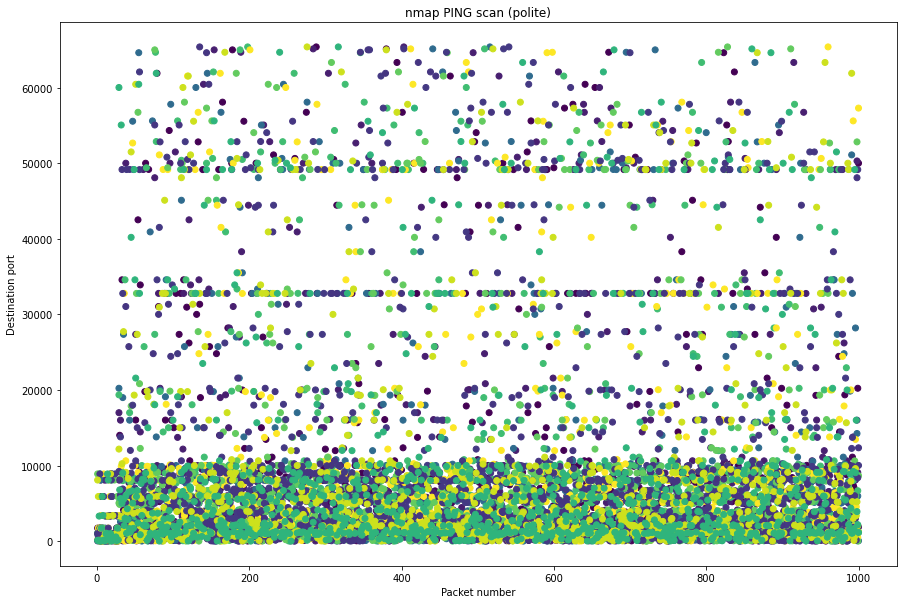

In [15]:
plt.xlabel('Packet number')
plt.ylabel('Destination port')
plt.title(scan_title)
plt.scatter(x='scannr', y='dport', c='sport', data=orders_port)
plt.savefig(directory + '/DstPacketNr.png')

In [16]:
#orders_port.set_index('scannr', inplace=True)
#orders_port.groupby('sport')['dport'].plot(legend=True)
#plt.xlabel('Packet number')
#plt.ylabel('Destination ports')
#plt.title(scan_title)

In [17]:
tcp_sports = []
tcp_dports = []
payloads = []
run = []
i = 1

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                tcp_sports.append(row['tcp_sport'][x])
                tcp_dports.append(row['tcp_dport'][x])
                run.append(i)
            payloads.append(row['payload'][x])

    i = i+1
payloads = pd.DataFrame(payloads)

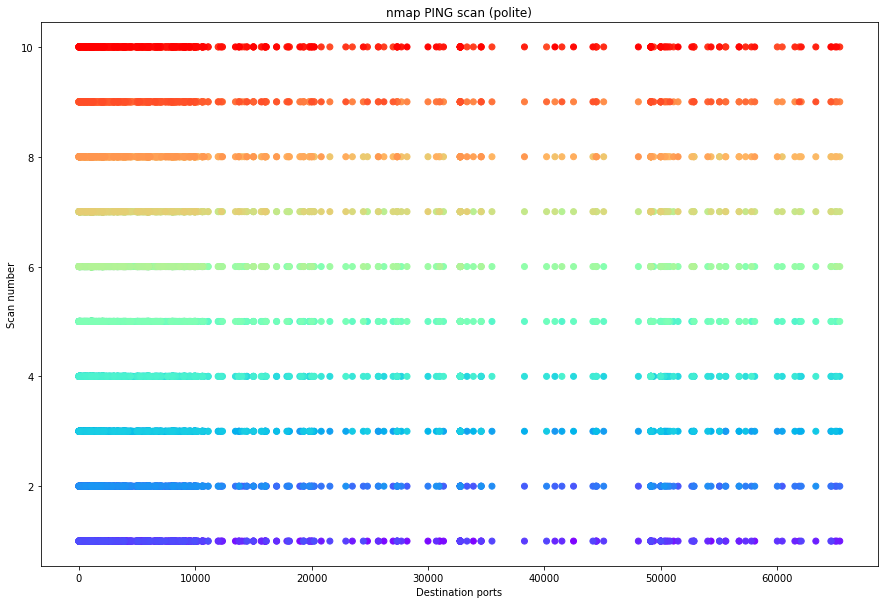

In [18]:
y = run
x = tcp_dports
colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.ylabel('Scan number')
plt.xlabel('Destination ports')
plt.title(scan_title)
plt.scatter(x, y, color=colors)
plt.savefig(directory + '/ScanNrDstPort.png')
plt.show()

## Payloads

In [19]:
payloads.value_counts()

0.0    10000
dtype: int64

## IP-ID

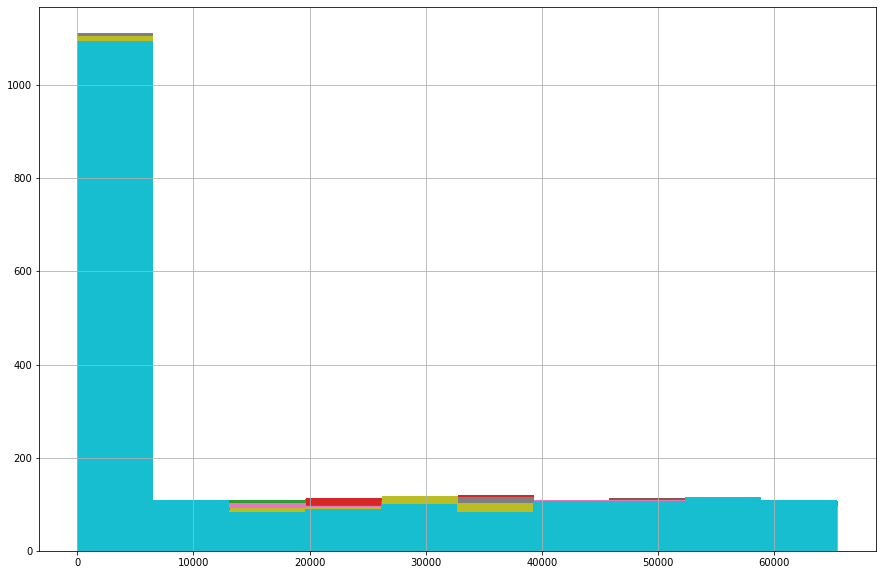

In [20]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            pass
    
    scan['ip_id'].hist()

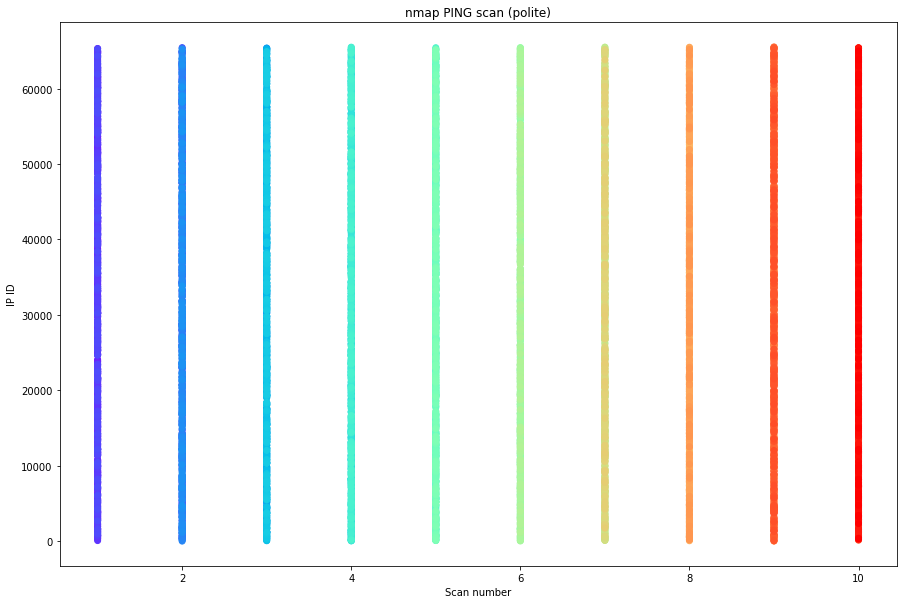

In [21]:
ip_ids = []
scan_number = []
scan_nr = 0

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            scan_number.append(scan_nr)



x = scan_number
ys = ip_ids
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
plt.xlabel('Scan number')
plt.ylabel('IP ID')
plt.title(scan_title)
plt.scatter(x, ys, color=colors)
plt.savefig(directory + '/IPIDScanNr.png')
plt.show()


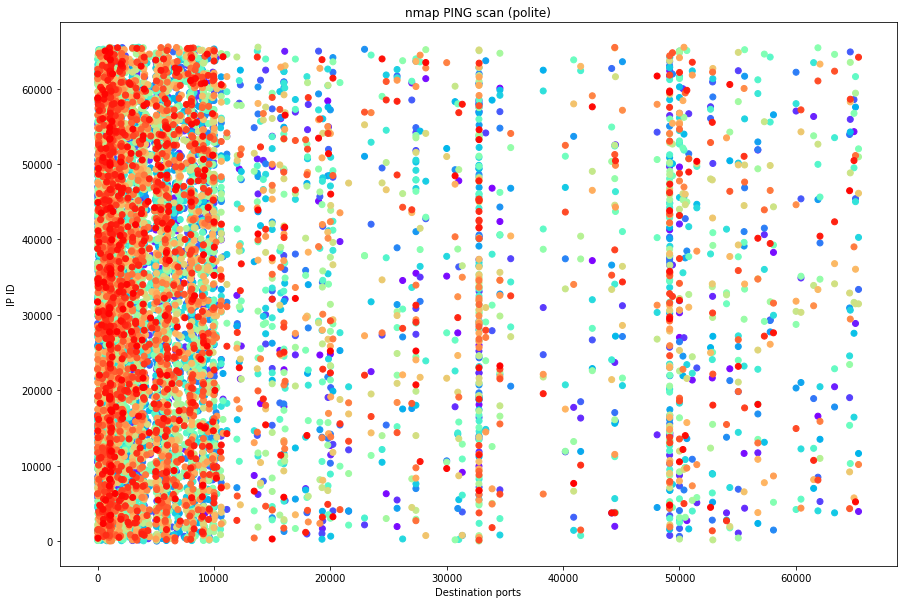

In [22]:
ip_ids = []
scan_number = []
dst_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                dst_ports.append(row['tcp_dport'][x])

if dst_ports:
    x = dst_ports
    ys = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDDstPort.png')
    plt.show()

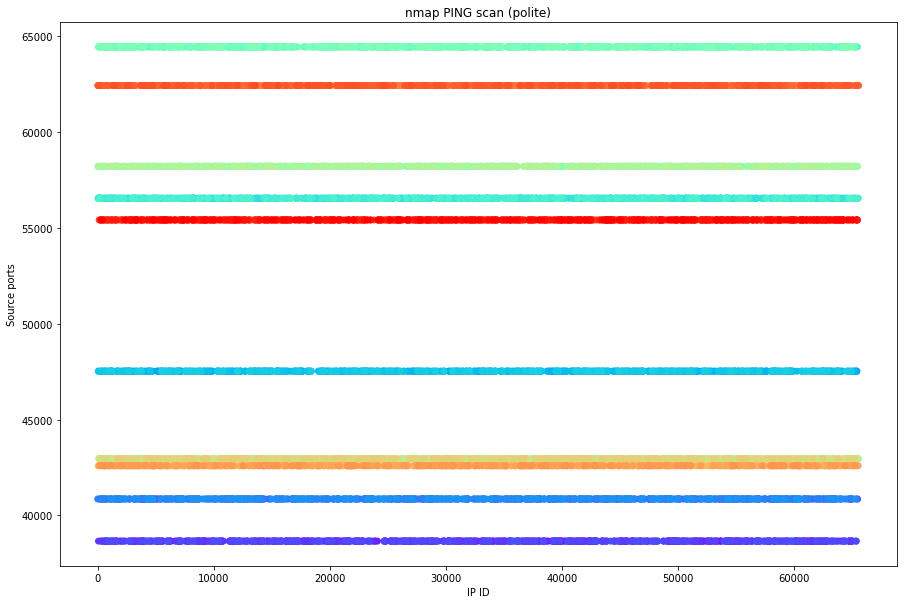

In [23]:
ip_ids = []
scan_number = []
src_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                src_ports.append(row['tcp_sport'][x])

if src_ports:
    ys = src_ports
    x = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.ylabel('Source ports')
    plt.xlabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDSrcPort.png')
    plt.show()

## Packet size
Calculate 'Packet size' - note that this is only ip + udp/icmp/tcp (no ethernet header included in the calculation)

In [24]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                packet_size = scan['ip_len'][x]
            elif scan['ip_proto'][x] == 14: # udp
                packet_size = scan['ip_len'][x] + scan['udp_len'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                packet_size = scan['ip_len'][x] + scan['icmp_len'][x]
            else:
                packet_size = None

            if packet_size:
                print(f"Packet length: {packet_size}")
            
    print("-----")

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

## TCP Window size

In [25]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                window_size = scan['tcp_window'][x]
            else:
                window_size = None
                
            if window_size:
                print(f"Window size: {window_size}")
            
    print("-----")

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

## Sequence number


In [26]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                sequence_nr = scan['tcp_seq'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                sequence_nr = scan['icmp_seq'][x]
            else:
                sequence_nr = None
                
            if sequence_nr:
                print(f"Sequence number: {sequence_nr}")
            
    print("-----")

Sequence number: 2721732156
Sequence number: 2721732156
Sequence number: 2721732156
Sequence number: 2721732156
Sequence number: 2721732156
Sequence number: 2721732156
Sequence number: 2721732156
Sequence number: 2721732156
Sequence number: 2721732156
Sequence number: 2721732156
Sequence number: 2721732156
Sequence number: 2721732156
Sequence number: 2721732156
Sequence number: 2721732156
Sequence number: 2721732156
Sequence number: 2721732156
Sequence number: 2721732156
Sequence number: 2721732156
Sequence number: 2721732156
Sequence number: 2721732156
Sequence number: 2721732156
Sequence number: 2721732156
Sequence number: 2721732156
Sequence number: 2721732156
Sequence number: 2721732156
Sequence number: 2721732156
Sequence number: 2721732156
Sequence number: 2721732156
Sequence number: 2721732156
Sequence number: 2721732156
Sequence number: 2721732156
Sequence number: 2721732156
Sequence number: 2721732156
Sequence number: 2721732156
Sequence number: 2721732156
Sequence number: 272

Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence num

Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence number: 47634311
Sequence num

Sequence number: 1625816204
Sequence number: 1625816204
Sequence number: 1625816204
Sequence number: 1625816204
Sequence number: 1625816204
Sequence number: 1625816204
Sequence number: 1625816204
Sequence number: 1625816204
Sequence number: 1625816204
Sequence number: 1625816204
Sequence number: 1625816204
Sequence number: 1625816204
Sequence number: 1625816204
Sequence number: 1625816204
Sequence number: 1625816204
Sequence number: 1625816204
Sequence number: 1625816204
Sequence number: 1625816204
Sequence number: 1625816204
Sequence number: 1625816204
Sequence number: 1625816204
Sequence number: 1625816204
Sequence number: 1625816204
Sequence number: 1625816204
Sequence number: 1625816204
Sequence number: 1625816204
Sequence number: 1625816204
Sequence number: 1625816204
Sequence number: 1625816204
Sequence number: 1625816204
Sequence number: 1625816204
Sequence number: 1625816204
Sequence number: 1625816204
Sequence number: 1625816204
Sequence number: 1625816204
Sequence number: 162

Sequence number: 1435946999
Sequence number: 1435946999
Sequence number: 1435946999
Sequence number: 1435946999
Sequence number: 1435946999
Sequence number: 1435946999
Sequence number: 1435946999
Sequence number: 1435946999
Sequence number: 1435946999
Sequence number: 1435946999
Sequence number: 1435946999
Sequence number: 1435946999
Sequence number: 1435946999
Sequence number: 1435946999
Sequence number: 1435946999
Sequence number: 1435946999
Sequence number: 1435946999
Sequence number: 1435946999
Sequence number: 1435946999
Sequence number: 1435946999
Sequence number: 1435946999
Sequence number: 1435946999
Sequence number: 1435946999
Sequence number: 1435946999
Sequence number: 1435946999
Sequence number: 1435946999
Sequence number: 1435946999
Sequence number: 1435946999
Sequence number: 1435946999
Sequence number: 1435946999
Sequence number: 1435946999
Sequence number: 1435946999
Sequence number: 1435946999
Sequence number: 1435946999
Sequence number: 1435946999
Sequence number: 143

Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
S

Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
Sequence number: 483120489
S

Sequence number: 637190013
Sequence number: 637190013
Sequence number: 637190013
Sequence number: 637190013
Sequence number: 637190013
Sequence number: 637190013
Sequence number: 637190013
Sequence number: 637190013
Sequence number: 637190013
Sequence number: 637190013
Sequence number: 637190013
Sequence number: 637190013
Sequence number: 637190013
Sequence number: 637190013
Sequence number: 637190013
Sequence number: 637190013
Sequence number: 637190013
Sequence number: 637190013
Sequence number: 637190013
Sequence number: 637190013
Sequence number: 637190013
Sequence number: 637190013
Sequence number: 637190013
Sequence number: 637190013
Sequence number: 637190013
Sequence number: 637190013
Sequence number: 637190013
Sequence number: 637190013
Sequence number: 637190013
Sequence number: 637190013
Sequence number: 637190013
Sequence number: 637190013
Sequence number: 637190013
Sequence number: 637190013
Sequence number: 637190013
Sequence number: 637190013
Sequence number: 637190013
S

Sequence number: 1059526193
Sequence number: 1059526193
Sequence number: 1059526193
Sequence number: 1059526193
Sequence number: 1059526193
Sequence number: 1059526193
Sequence number: 1059526193
Sequence number: 1059526193
Sequence number: 1059526193
Sequence number: 1059526193
Sequence number: 1059526193
Sequence number: 1059526193
Sequence number: 1059526193
Sequence number: 1059526193
Sequence number: 1059526193
Sequence number: 1059526193
Sequence number: 1059526193
Sequence number: 1059526193
Sequence number: 1059526193
Sequence number: 1059526193
Sequence number: 1059526193
Sequence number: 1059526193
Sequence number: 1059526193
Sequence number: 1059526193
Sequence number: 1059526193
Sequence number: 1059526193
Sequence number: 1059526193
Sequence number: 1059526193
Sequence number: 1059526193
Sequence number: 1059526193
Sequence number: 1059526193
Sequence number: 1059526193
Sequence number: 1059526193
Sequence number: 1059526193
Sequence number: 1059526193
Sequence number: 105

Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence num

Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence number: 74241013
Sequence num

Sequence number: 1449586262
Sequence number: 1449586262
Sequence number: 1449586262
Sequence number: 1449586262
Sequence number: 1449586262
Sequence number: 1449586262
Sequence number: 1449586262
Sequence number: 1449586262
Sequence number: 1449586262
Sequence number: 1449586262
Sequence number: 1449586262
Sequence number: 1449586262
Sequence number: 1449586262
Sequence number: 1449586262
Sequence number: 1449586262
Sequence number: 1449586262
Sequence number: 1449586262
Sequence number: 1449586262
Sequence number: 1449586262
Sequence number: 1449586262
Sequence number: 1449586262
Sequence number: 1449586262
Sequence number: 1449586262
Sequence number: 1449586262
Sequence number: 1449586262
Sequence number: 1449586262
Sequence number: 1449586262
Sequence number: 1449586262
Sequence number: 1449586262
Sequence number: 1449586262
Sequence number: 1449586262
Sequence number: 1449586262
Sequence number: 1449586262
Sequence number: 1449586262
Sequence number: 1449586262
Sequence number: 144

Sequence number: 3014975272
Sequence number: 3014975272
Sequence number: 3014975272
Sequence number: 3014975272
Sequence number: 3014975272
Sequence number: 3014975272
Sequence number: 3014975272
Sequence number: 3014975272
Sequence number: 3014975272
Sequence number: 3014975272
Sequence number: 3014975272
Sequence number: 3014975272
Sequence number: 3014975272
Sequence number: 3014975272
Sequence number: 3014975272
Sequence number: 3014975272
Sequence number: 3014975272
Sequence number: 3014975272
Sequence number: 3014975272
Sequence number: 3014975272
Sequence number: 3014975272
Sequence number: 3014975272
Sequence number: 3014975272
Sequence number: 3014975272
Sequence number: 3014975272
Sequence number: 3014975272
Sequence number: 3014975272
Sequence number: 3014975272
Sequence number: 3014975272
Sequence number: 3014975272
Sequence number: 3014975272
Sequence number: 3014975272
Sequence number: 3014975272
Sequence number: 3014975272
Sequence number: 3014975272
Sequence number: 301

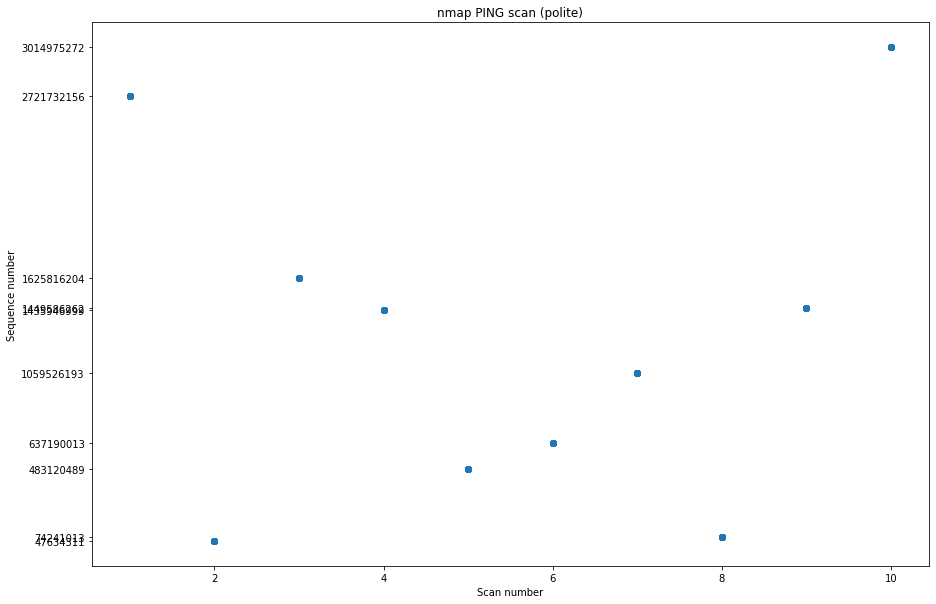

In [27]:
sequences = []
scan_number = []
scan_nr = 0
dst_ports = []
src_ports = []

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:

            if scan['ip_proto'][x] == 6: # tcp
                sequences.append(row['tcp_seq'][x])
                dst_ports.append(row['tcp_dport'][x])
                src_ports.append(row['tcp_sport'][x])
            elif scan['ip_proto'][x] == 1: # icmp
                sequences.append(row['icmp_seq'][x])

            scan_number.append(scan_nr)


x = scan_number
ys = sequences

plt.xlabel('Scan number')
plt.ylabel('Sequence number')
plt.title(scan_title)
yvals = []
for y in set(ys):
    yvals.append(int(y))

plt.yticks(yvals, yvals)
plt.scatter(x, ys)
plt.savefig(directory + '/SeqNrScanNr.png')
plt.show()


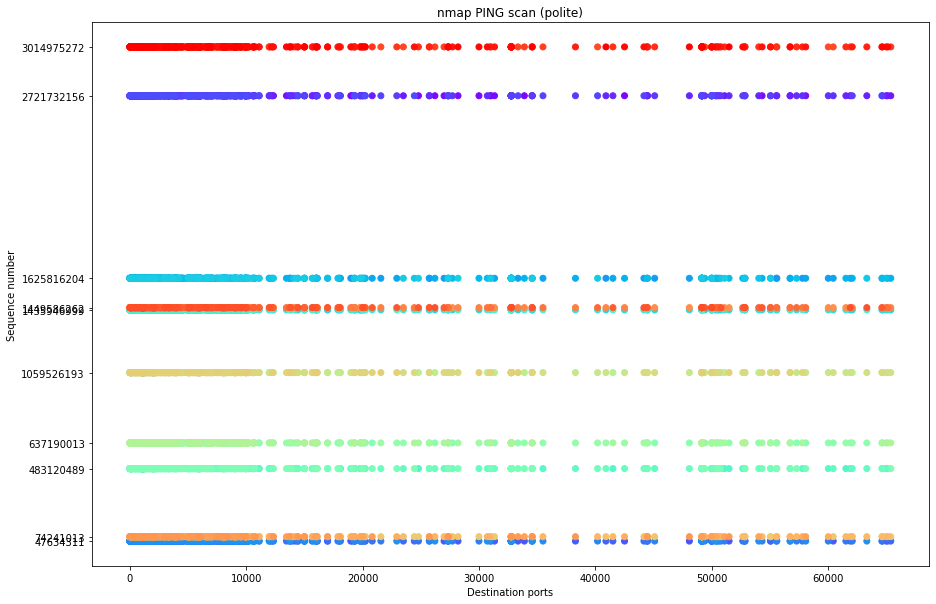

In [28]:
if dst_ports:
    x = dst_ports
    ys = sequences
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/SeqNrDstPort.png')
    plt.show()

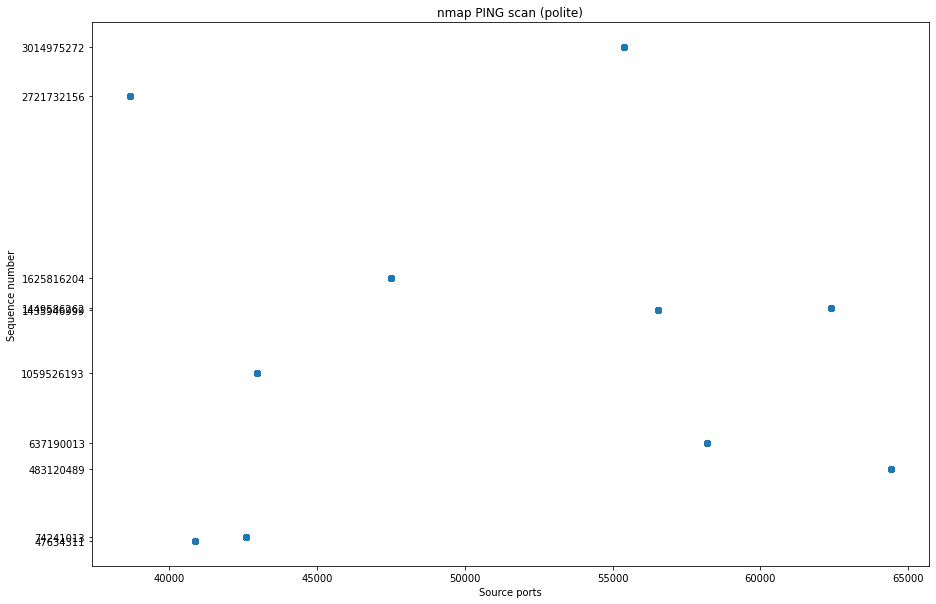

In [29]:
if src_ports:
    x = src_ports
    ys = sequences
    plt.xlabel('Source ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys)
    plt.savefig(directory + '/SeqNrSrcPort.png')
    plt.show()


In [30]:
len(set(orders_port['sport']))

10

## Flags

In [31]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                flags = scan['tcp_flags'][x]
            elif scan['ip_proto'][x] == 14 or scan['ip_proto'][x] == 1: # udp and icmp
                flags = scan['ip_flags'][x]
            else:
                flags = None

            if flags:
                print(f"Flags: {flags}")
            
    print("-----")

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F